## Cobined Indexing

For even more powerful operations, fancy indexing can be combined with other indexing schems:

In [1]:
import numpy as np

In [2]:
x = np.arange(12).reshape(3, 4)

In [3]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We con combine fancy and simple indeices:

In [4]:
x[2, [2, 0, 1]]

array([10,  8,  9])

> We can also combine fancy indexing with slicing:

In [5]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [6]:
mask = np.array([1, 0, 1, 0], dtype= bool)

row = np.array([0, 1, 2])

x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flaxible set of operations for accessing and modifying array values.

## Example: Selectign Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we mighgt have an N by D matrix representing N points in D dimentsions, such as the following points drawn form a two-dimensional normal distribution:

In [7]:
mean = [0, 0]

cov = [[1, 2],
       [2, 5]]

X = np.random.multivariate_normal(mean, cov, 100)

X.shape

(100, 2)

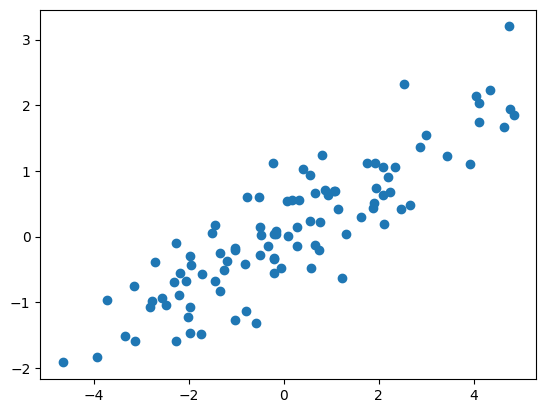

In [8]:
# Ploting...

import matplotlib.pyplot as plt

import seaborn

plt.scatter( x = X[:, 1], y = X[:, 0])

# X[:, 1] means all rows of 2nd col, and X[:, 0] means 1st column wiht all rows

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [9]:
indices = np.random.choice(X.shape[0], 20, replace = False)

indices

array([53, 80, 34, 30, 94, 15, 99, 96, 41, 92, 66,  8, 89, 48, 58, 74, 28,
       44, 75, 82])

In [10]:
selection = X[indices] # fancy indexing here

selection.shape

(20, 2)

Now, to see which points were selected, let's over-plot large circles at the locations of the selected points

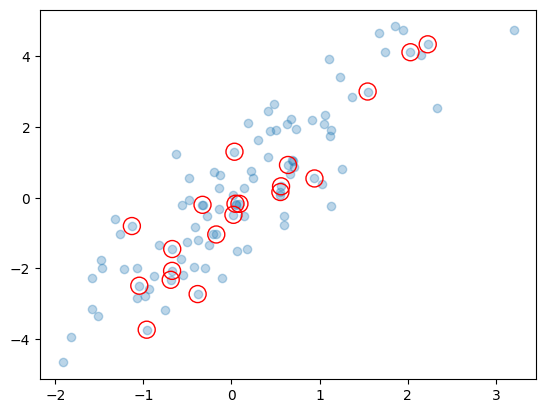

In [11]:
plt.scatter(X[:, 0], X[:, 1], alpha= 0.3)
plt.scatter(selection[:, 0], selection[:, 1], color = 'red', facecolor = 'none', s = 150)

### Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in array to some values:

In [16]:
x = np.arange(10)

i = np.array([2, 1, 8, 4])

x[i] = 99

print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [18]:
# we can use any assignment-type operator for this. For example:

x[i] -=10

print (x)

[ 0 79 79  3 79  5  6  7 79  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [21]:
x = np.zeros(10)

x[[0, 0]] = [4, 6]

print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


> Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.

In [23]:
# Fair engouh, but consider this operation:

i = [2, 3, 3, 4, 4, 4]

x[i] +=1

print(x)

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


You might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case?

Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1.

x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

In [25]:
x = np.zeros(10)

i = [2, 3, 3, 4, 4, 4]

np.add.at(x, i, 1)

print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The at() method does an in-place application of the given operator at the specified indices (here, i) with the specified value (here, 1). Another method that is similar in spirit is the reduceat() method of ufuncs, which you can read about in the NumPy documentation.

## Example: Binning Data

YOu can use these ideas to efficiently bin data to create a histogram by hand. For example, imagine we have 1000 values and would like to quickly find where they fall within an array of bins. We could compute it using ufunc.at like this:

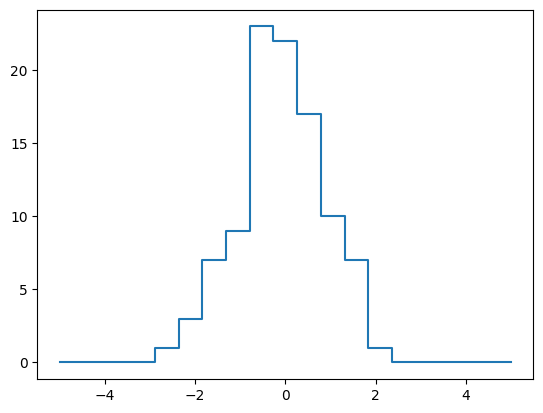

In [60]:
np.random.seed(42)

x = np.random.randn(100)

# comput a hisgtogram by hand

bins = np.linspace(-5, +5, 20)

counts = np.zeros_like(bins)

#find appropriate bin for each x

i = np.searchsorted(bins, x)

# add 1 to each of these bins

np.add.at(counts , i, 1)

#plot the results

plt.plot(bins, counts, drawstyle = 'steps-pre') # or ds = "steps"

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x22ae8ae82d0>])

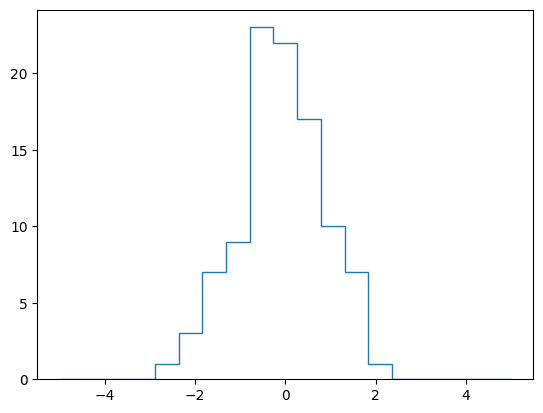

In [63]:
plt.hist(x, bins, histtype = 'step')

In [64]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

NumPy routine:
52.5 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [65]:
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine:
37.5 µs ± 4.48 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [66]:
x = np.random.randn(1000000)

print("NumPy routine:")
 
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")

%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
106 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
271 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
